Signalvergleich

* *WPS*: Derzeitige "Wind-Peak-Shaving" Operationalisierung im PE-Excel
* *RES*: Prognostizierte Residuallasten der jährlichen Szenarien
* (*AVG*: Rolling-Average Profile unterschiedlicher Herkunft (MA Nutz, Preissignale))


Die Signal-Analyse läuft für alle betrachteten Signale anhand folgender Schritte ab:
1. Normalisierung der Quelldaten auf einen *kontinuierlichen* Wertebereich von 0-1
    * WPS: Anhand der Nennleistung (bzw. der maximalen Leistung)
    * RES: Anhand der maximalen positiven Residuallast
    * (zu prüfen: AVG: Mittelwert - Maximalwert -> 0 - 1)
2. Diskretisierung auf zwei Werte: 0, 1 anhand eines **cut-off** Parameters
3. Darstellung der Signaleigenschaften
    * Verhältnis zwischen Zeiträumen von Signal / Nicht-Signal
    * Mittelwert und Verteilung der Signaldauer
    * Mittelwert und Verteilung der Dauer von Nicht-Signalen

In [3]:
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2
import pandas as pd
import FLUCCOplus.transform as traffo
import FLUCCOplus.signal as fps
import FLUCCOplus.plots as fpp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
FLUCCOplus.config  loaded!
FLUCCOplus.notebooks loaded!


In [4]:
#Q: Magst du das Jahr und cut-off nicht gliech am Anfang definieren lassen? und dann wäre es für alle Signalvariante einmal gültig...

## PE-Excel
Signale aus der PE-Excel

In [5]:
source = fps.load_peexcel()

(<Figure size 864x432 with 2 Axes>, <AxesSubplot:>)

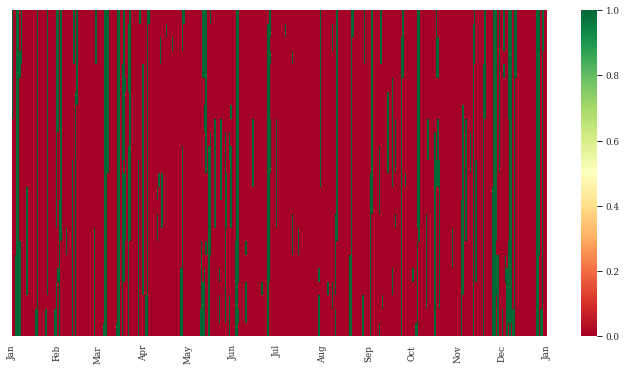

In [6]:
nm = traffo.normalize(source)
dc = traffo.discretize(nm, separator=0.5, min=0., max=1.)
fpp.heatmap_figure(dc["Wind 2013"])

## WEB Windsignale
Zweite Art von Signalen stellen die tatsächlich gemessenen Windprofile der W.E.B.

In [7]:
web = fps.load_web(2018)

(<Figure size 864x432 with 2 Axes>, <AxesSubplot:>)

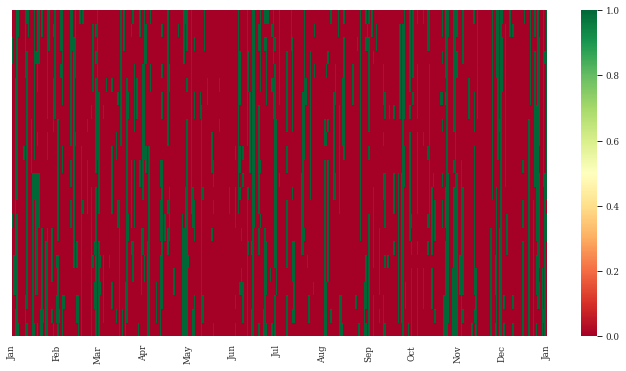

In [8]:
web_dc = traffo.discretize(web, separator=0.5, min=0., max=1.)
fpp.heatmap_figure(web_dc["Neuhof III"])

## Spotprice
Eine dritte Art von Signalen stammen aus einer Spotpreise-Analyse

In [9]:
spot = fps.load_spotprice(year=2018)

In [10]:
spot_dc = traffo.discretize(spot, separator=0.5, min=0., max=1.)

(<Figure size 864x432 with 10 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>], dtype=object))

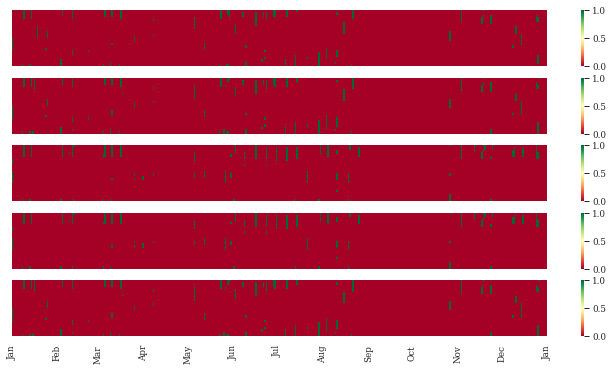

In [11]:
fpp.heatmap_figure(spot_dc)

## PyPSA
Die letzte Art von Signalen stammen aus einer Masterarbeit, welche mithilfe PyPSA ...

In [12]:
pypsa = fps.load_pypsa_avg(2018)

In [13]:
pypsa_dc = traffo.discretize(pypsa, separator=0.5, min=0., max=1.) # das ist ja hier unnötig, da es schon 0,1 ist, oder??

(<Figure size 864x432 with 12 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>], dtype=object))

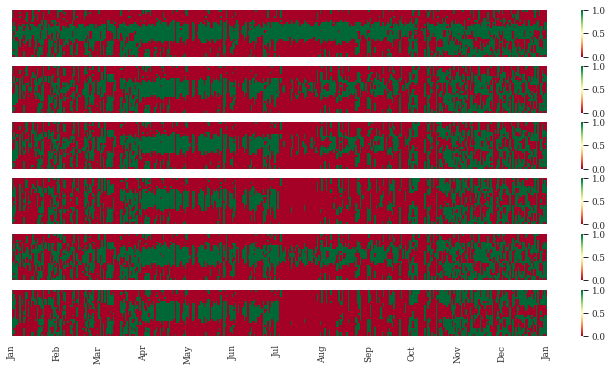

In [14]:
fpp.heatmap_figure(pypsa_dc)

In [23]:
traffo.signaleigenschaften(pypsa_dc, separator=0.5)

,Zeitraum mit Signal [h],Nicht-Signal-Zeitraum [h],Anzahl Signal-Perioden,Durchschnittliche Dauer Signal [h],Durchschnittliche Dauer Nicht-Signal [h]
Schaltsignal_REF,4028,4732,674.0,5.976261,7.020772
Schaltsignal_REG,3457,5303,666.0,5.190691,7.962462
Schaltsignal_UBA30,3478,5282,667.0,5.214393,7.91904
Schaltsignal_UBA50,3050,5710,565.0,5.39823,10.106195
Schaltsignal_VEIGL30,3752,5008,718.0,5.225627,6.97493
Schaltsignal_VEIGL50,3048,5712,538.0,5.665428,10.6171
